## Figure Descriptions

- <b>Figure 2:</b>
    - A: Breakdown of pathways with clustering based on COGs
    - B: Major COGS further divided into pathways based on KEGG annotation


### Import libraries and set global plotting parameters

In [19]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

plt.rcParams.update(custom_params)
sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

### First draft of Figure 3A with COG mapping

<Figure size 800x600 with 0 Axes>

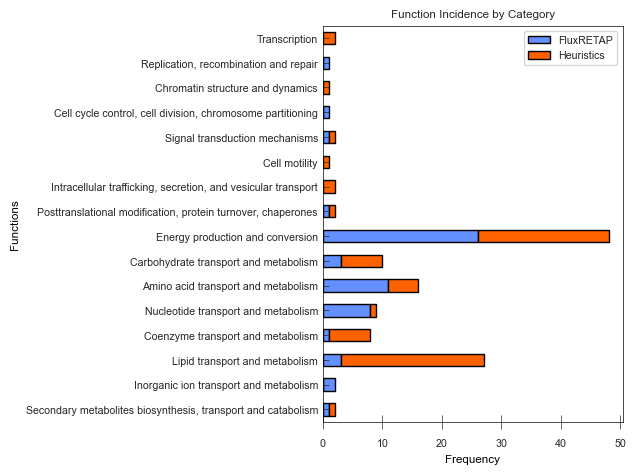

In [20]:
# Load the first .csv with letter codes
data = pd.read_csv('241117_COGs.csv')

# Extract the 'Cat' column
cat_data = data['Letter']
letters = cat_data.str.split().explode()
letter_counts = letters.value_counts()

# Load the second .csv with letter-to-function mappings
mapping_data = pd.read_csv('241117_Codex.csv')  # Replace with actual filename
mapping_dict = dict(zip(mapping_data['Letter'], mapping_data['Function']))
letter_counts.index = letter_counts.index.map(mapping_dict)

# Add the Category data from the original CSV to the letters dataframe
source_data = data['Source'].repeat(cat_data.str.split().str.len())  # Repeat the category per letter in the row

# Combine the letters with the corresponding categories
letters_df = pd.DataFrame({
    'Letter': letters,
    'Source': source_data})

# Count occurrences of Letter-Category pairs
letter_category_counts = letters_df.groupby(['Letter', 'Source']).size().unstack(fill_value=0)
custom_order = ["Q", "P", "I", "H", "F", "E", "G", "C", "O", "U", "N", "T", "D", "B", "L", "K"]

# Reorder the index (functions) based on the custom order
letter_category_counts = letter_category_counts.reindex(custom_order)

# Map the letter codes to functions
letter_category_counts.index = letter_category_counts.index.map(mapping_dict)

# Plot a stacked bar plot
plt.figure(figsize=(8, 6))
letter_category_counts.plot(kind='barh', stacked=True, edgecolor='black')
plt.title('Function Incidence by Category')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Functions')
plt.tight_layout()  # Ensures the layout fits well
plt.show()

### Large plot data import, map COGs and divide based on source

In [21]:
# Large Plot of all COGs
data = pd.read_csv('241117_COGs.csv')

cat_data = data['Letter']
letters = cat_data.str.split().explode()
letter_counts = letters.value_counts()

# Load the second .csv with letter-to-function mappings
mapping_data = pd.read_csv('241117_Codex.csv')  # Replace with actual filename
mapping_dict = dict(zip(mapping_data['Letter'], mapping_data['Function']))
letter_counts.index = letter_counts.index.map(mapping_dict)

# Add the Category data from the original CSV to the letters dataframe
source_data = data['Source'].repeat(cat_data.str.split().str.len())  # Repeat the category per letter in the row

# Combine the letters with the corresponding categories
letters_df = pd.DataFrame({
    'Letter': letters,
    'Source': source_data})

# Count occurrences of Letter-Category pairs
letter_category_counts1 = letters_df.groupby(['Letter', 'Source']).size().unstack(fill_value=0)
custom_order = ["Q", "P", "I", "H", "F", "E", "G", "C", "O", "U", "N", "T", "D", "B", "L", "K"]

# Reorder the index (functions) based on the custom order
letter_category_counts1 = letter_category_counts1.reindex(custom_order)

# Map the letter codes to functions
letter_category_counts1.index = letter_category_counts1.index.map(mapping_dict)

### Energy production and conversion pathways

In [22]:
data = pd.read_csv('241126_COG_C_Zoom.csv')

# Extract the 'Pathway' column and split it into multiple rows
path_data = data['Pathway']
source_data = data['Source']

# Create a DataFrame with Path and Source columns
paths_df = pd.DataFrame({
    'Path': path_data,
    'Source': source_data})

# Count occurrences of each pathway for each source
letter_category_counts2 = paths_df.groupby(['Path', 'Source']).size().unstack(fill_value=0)

### Lipid transport and metabolism pathways

In [23]:
data = pd.read_csv('241126_COG_I_Zoom.csv')

# Extract the 'Pathway' column and split it into multiple rows
path_data = data['Pathway']
source_data = data['Source']

# Create a DataFrame with Path and Source columns
paths_df = pd.DataFrame({
    'Path': path_data,
    'Source': source_data})

# Count occurrences of each pathway for each source
letter_category_counts3 = paths_df.groupby(['Path', 'Source']).size().unstack(fill_value=0)

### Plot major COGs and subdivided KEGG pathways for C/I

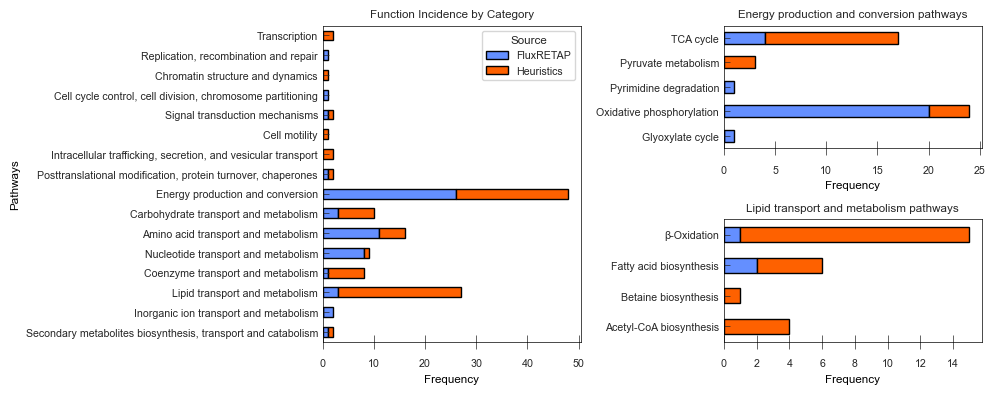

In [24]:
#Name of figure
fig_name='Figure_2A'

# Create the figure and subplots (1 larger plot on the left, 2 smaller stacked plots on the right)
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
letter_category_counts1.plot(kind='barh', stacked=True, edgecolor='black', ax=ax1)
ax1.set_title('Function Incidence by Category')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Pathways')

ax2 = fig.add_subplot(222)
letter_category_counts2.plot(kind='barh', stacked=True, edgecolor='black', ax=ax2)
ax2.set_title('Energy production and conversion pathways')
ax2.set_xlabel('Frequency')
ax2.legend().set_visible(False)
ax2.set_ylabel('')

ax3 = fig.add_subplot(224)
letter_category_counts3.plot(kind='barh', stacked=True, edgecolor='black', ax=ax3)
ax3.set_title('Lipid transport and metabolism pathways')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('')

ax3.legend().set_visible(False)

plt.tight_layout()

plt.savefig(f'Figure_Export\\{fig_name}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()